In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Este es el final. Para region externa tengo seleccionada una region mixta del R y el S que va entre 25 y 30 Mpc donde la densidad integrada, integrando desde 32 Mpc hacia dentro es de ~ 0 para ambos voids. El codigo que no esta desplegado es porque no esta adaptado para que ande y no lo puse en el TF.

In [2]:
tr=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop2_R.dat')
ts=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop2_S.dat')
masa_dm=0.09328805
masa_gs=0.018172996

In [3]:
#inr, = np.where(tr[:,0]<9.56)
#ins, = np.where(ts[:,0]<9.75)
#out,= np.where((ts[:,0]<30) & (ts[:,0]>25 ))

inr, = np.where(tr[:,0]<13)
ins, = np.where(ts[:,0]<10)
outs,= np.where((ts[:,0]<30) & (ts[:,0]>25 ))
outr,= np.where((tr[:,0]<30) & (tr[:,0]>25 ))

[]

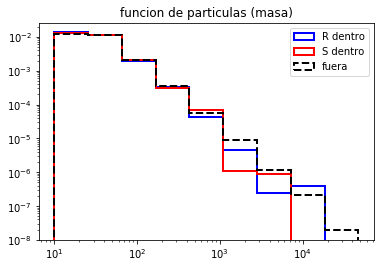

In [4]:
#aca 'dentro' son los respectivos radios de void (9.5 & 9.75)
#la cantidad de particulas de cada halo ES LA QUE ME DA ROCKSTAR
rango=(10,np.max(tr[outr,5]))
bines0=10
minimo=10
maximo=np.max(ts[outs,5])
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)
plt.title('funcion de particulas (masa)')

h1=tr[inr,5]
h2=ts[ins,5]
h3=np.append(tr[outr,5],ts[outs,5])
H1=plt.hist(h1,histtype='step',range=rango,bins=bines,density='true',lw=2,color='blue',label='R dentro')
H2=plt.hist(h2,histtype='step',range=rango,bins=bines,density='true',lw=2,color='red',label='S dentro')
H3=plt.hist(h3,histtype='step',range=rango,bins=bines,density='true',lw=2,color='black',ls='--',label='fuera')
plt.legend()
plt.semilogy()
plt.semilogx()

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/FuncionesMasa.png',format='png')

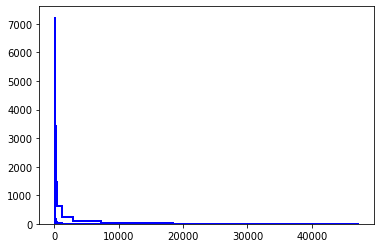

In [68]:
H1=plt.hist(h1,histtype='step',range=rango,bins=bines,lw=2,color='blue',label='R dentro')
H2=plt.hist(h2,histtype='step',range=rango,bins=bines,lw=2,color='blue',label='R dentro')
H3=plt.hist(h3,histtype='step',range=rango,bins=bines,lw=2,color='blue',label='R dentro')

x1=[]; x2=[]; x3=[]
A1=0; A2=0; A3=0
f1=[]; f2=[]; f3=[]
for i in range(len(H1[1])-1):
    f1.append(H1[0][i]/len(h1))
    f2.append(H2[0][i]/len(h2))
    f3.append(H3[0][i]/len(h3))
    abin=((H1[1][i+1])-(H1[1][i]))#*1e10*masa_dm
    x1.append(H1[1][i]+abin/2.)#*1e10*masa_dm)
    x2.append(H2[1][i]+abin/2.)#*1e10*masa_dm)
    x3.append(H3[1][i]+abin/2.)#*1e10*masa_dm)
    
    A1=A1+abin*f1[i]
    A2=A2+abin*f2[i]
    A3=A3+abin*f3[i]

f1=np.array(f1)

Text(0, 0.5, 'f')

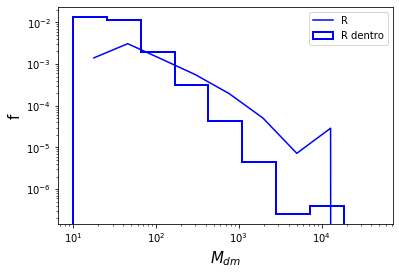

In [69]:
plt.hist(h1,histtype='step',range=rango,bins=bines,density='true',lw=2,color='blue',label='R dentro')
plt.plot(x1,f1/A1,color='blue',label='R')
#plt.fill_between(x1, H1[0]*1e10*masa_dm/A1-np.sqrt(H1[0])*1e10*masa_dm/A1, H1[0]*1e10*masa_dm/A1+np.sqrt(H1[0])*1e10*masa_dm/A1,color='blue', alpha=0.2)
#plt.plot(x2,H2[0]*1e10*masa_dm/A2,color='red',ls='-',label='S')
#plt.fill_between(x1, H2[0]*1e10*masa_dm/A2-np.sqrt(H2[0])*1e10*masa_dm/A2, H2[0]*1e10*masa_dm/A2+np.sqrt(H2[0])*1e10*masa_dm/A2,color='red', alpha=0.2)
#plt.plot(x3,H3[0]*1e10*masa_dm/A3,color='black',ls='--',label='out')
#plt.fill_between(x3, H3[0]*1e10*masa_dm/A3-np.sqrt(H3[0])*1e10*masa_dm/A3, H3[0]*1e10*masa_dm/A3+np.sqrt(H3[0])*1e10*masa_dm/A3,color='black', alpha=0.2)
plt.legend()

plt.semilogx()
plt.semilogy()
plt.xlabel('$M_{dm}$',size=15)
plt.ylabel('f',size=15)

In [39]:
H1[1]

array([1.00000000e+01, 2.56066991e+01, 6.55703038e+01, 1.67903904e+02,
       4.29946474e+02, 1.10095100e+03, 2.81917209e+03, 7.21896914e+03,
       1.84853971e+04, 4.73350000e+04])

In [5]:
#voy a cortar en 100, 1000 y 10000 ESTO ES TENIENDO EN CUENTA LAS PARTICULAS DE ROCKSTAR 
lm1=120
lm2=300

cut0_r, = np.where((tr[inr,5]<=lm1) & (tr[inr,5]>70))
cut1_r, = np.where((tr[inr,5]>lm1) & (tr[inr,5]<=lm2))
cut2_r, = np.where(tr[inr,5]>lm2)

cut0_s, = np.where((ts[ins,5]<=lm1) & (ts[ins,5]>70))
cut1_s, = np.where((ts[ins,5]>lm1) & (ts[ins,5]<=lm2))
cut2_s, = np.where(ts[ins,5]>lm2)

cut0_u, = np.where((ts[out,5]<=lm1) & (ts[out,5]>70))
cut1_u, = np.where((ts[out,5]>lm1) & (ts[out,5]<=lm2))
cut2_u, = np.where(ts[out,5]>lm2)

In [6]:
#voy a cortar en 100, 1000 y 10000
# ACA MIRO LAS PARTIUCLAS QUE YO IDENTIFICO 
lm1=120
lm2=300
lm3=800

cut0_r, = np.where((tr[inr,7]<=lm1) & (tr[inr,6]>60))
cut1_r, = np.where((tr[inr,7]>lm1) & (tr[inr,7]<=lm2))
cut2_r, = np.where((tr[inr,7]>lm2) & (tr[inr,7]<lm3))

cut0_s, = np.where((ts[ins,7]<=lm1) & (ts[ins,6]>60))
cut1_s, = np.where((ts[ins,7]>lm1) & (ts[ins,7]<=lm2))
cut2_s, = np.where((ts[ins,7]>lm2)& (ts[ins,7]<lm3))

cut0_us, = np.where((ts[outs,7]<=lm1) & (ts[outs,6]>60))
cut1_us, = np.where((ts[outs,7]>lm1) & (ts[outs,7]<=lm2))
cut2_us, = np.where((ts[outs,7]>lm2) & (ts[outs,7]<lm3))

cut0_ur, = np.where((tr[outr,7]<=lm1) & (tr[outr,6]>60))
cut1_ur, = np.where((tr[outr,7]>lm1) & (tr[outr,7]<=lm2))
cut2_ur, = np.where((tr[outr,7]>lm2) & (tr[outr,7]<lm3))

[]

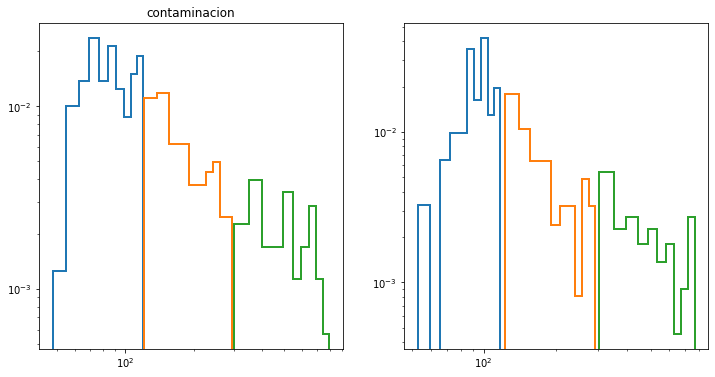

In [27]:
#en estos plots ahora estoy haciendo los histogramas de las particulas QUE YO IDENTIFICO de cada halo para medir 
#el nivel de contaminacion que estoy teniendo.. 
plt.figure(figsize=(12,6))
plt.title('contaminacion')
plt.subplot(121)
plt.title('contaminacion')

plt.hist(tr[inr,7][cut0_r],histtype='step',bins=10,lw=2,density='true')
plt.hist(tr[inr,7][cut1_r],histtype='step',bins=10,lw=2,density='true')
plt.hist(tr[inr,7][cut2_r],histtype='step',bins=10,lw=2,density='true')
plt.semilogy()
plt.semilogx()

plt.subplot(122)
plt.hist(ts[ins,7][cut0_s],histtype='step',bins=10,lw=2,density='true')
plt.hist(ts[ins,7][cut1_s],histtype='step',bins=10,lw=2,density='true')
plt.hist(ts[ins,7][cut2_s],histtype='step',bins=10,lw=2,density='true')
plt.semilogy()
plt.semilogx()

In [7]:
print('corte 1, dentro void S',len(ts[ins,7][cut0_s]))
print('corte 2, dentro void S',len(ts[ins,7][cut1_s]))
print('corte 3, dentro void S',len(ts[ins,7][cut2_s]))

print('corte 1, dentro void R',len(tr[inr,7][cut0_r]))
print('corte 2, dentro void R',len(tr[inr,7][cut1_r]))
print('corte 3, dentro void R',len(tr[inr,7][cut2_r]))

corte 1, dentro void S 48
corte 2, dentro void S 73
corte 3, dentro void S 48
corte 1, dentro void R 111
corte 2, dentro void R 92
corte 3, dentro void R 36


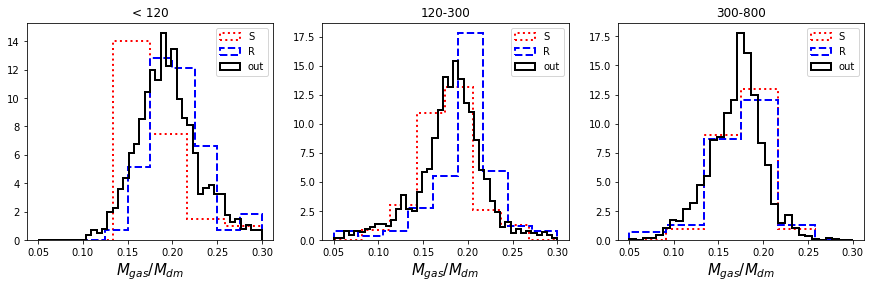

In [14]:
plt.figure(figsize=(15,4))
bines=20
plt.subplot(131)
range=(0.05,0.30)
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
plt.title('< 120')
h1=(ts[ins,6][cut0_s])*masa_gs/(ts[ins,7][cut0_s]*masa_dm)
h2=(tr[inr,6][cut0_r])*masa_gs/(tr[inr,7][cut0_r]*masa_dm)
h3=np.append((ts[outs,6][cut0_us])*masa_gs/(ts[outs,7][cut0_us]*masa_dm),
             (tr[outr,6][cut0_ur])*masa_gs/(tr[outr,7][cut0_ur]*masa_dm))
bines1=int(np.sqrt(len(h1)))
bines2=int(np.sqrt(len(h2)))
bines3=int(np.sqrt(len(h3)))
plt.hist(h1,histtype='step',lw=2,range=range,density='true',label='S',color='red',bins=bines1,ls='dotted')
plt.hist(h2,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines2,ls='--')
plt.hist(h3,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='-',bins=bines3)
plt.legend()
plt.xlabel('$M_{gas}/M_{dm}$',size=15)

plt.subplot(132)
plt.title('120-300')
#range=(np.min(ts[outs,6][cut1_us]*masa_gs/ts[outs,7][cut1_us]*masa_dm),np.max(ts[outs,6][cut1_us]*masa_gs/ts[outs,7][cut1_us]*masa_dm))
h1=(ts[ins,6][cut1_s])*masa_gs/(ts[ins,7][cut1_s]*masa_dm)
h2=(tr[inr,6][cut1_r])*masa_gs/(tr[inr,7][cut1_r]*masa_dm)
h3=np.append((ts[outs,6][cut1_us])*masa_gs/(ts[outs,7][cut1_us]*masa_dm),
             (tr[outr,6][cut1_ur])*masa_gs/(tr[outr,7][cut1_ur]*masa_dm))
bines1=int(np.sqrt(len(h1)))
bines2=int(np.sqrt(len(h2)))
bines3=int(np.sqrt(len(h3)))
plt.hist(h1,histtype='step',lw=2,range=range,density='true',label='S',color='red',bins=bines1,ls='dotted')
plt.hist(h2,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines2,ls='--')
plt.hist(h3,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='-',bins=bines3)
plt.legend()
plt.xlabel('$M_{gas}/M_{dm}$',size=15)

plt.subplot(133)
plt.title('300-800')
#range=(np.min(ts[outs,6][cut2_us]*masa_gs/ts[outs,7][cut2_us]*masa_dm),np.max(ts[outs,6][cut1_us]*masa_gs/ts[outs,7][cut1_us]*masa_dm))
h1=(ts[ins,6][cut2_s])*masa_gs/(ts[ins,7][cut2_s]*masa_dm)
h2=(tr[inr,6][cut2_r])*masa_gs/(tr[inr,7][cut2_r]*masa_dm)
h3=np.append((ts[outs,6][cut2_us])*masa_gs/(ts[outs,7][cut2_us]*masa_dm),
             (tr[outr,6][cut2_ur])*masa_gs/(tr[outr,7][cut2_ur]*masa_dm))
bines1=int(np.sqrt(len(h1)))
bines2=int(np.sqrt(len(h2)))
bines3=int(np.sqrt(len(h3)))
plt.hist(h1,histtype='step',lw=2,range=range,density='true',label='S',color='red',bins=bines1,ls='dotted')
plt.hist(h2,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines2,ls='--')
plt.hist(h3,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='-',bins=bines3)
plt.legend()
plt.xlabel('$M_{gas}/M_{dm}$',size=15)
#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/Fraccion_cortemasa1.png',format='png')

Repito el plot anterior pero sumando las estrellas a la masa de gas

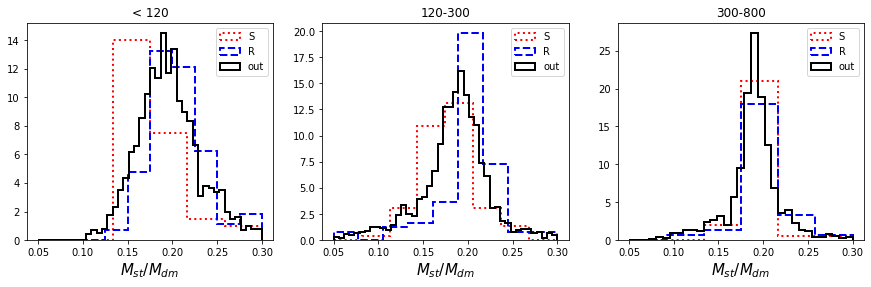

In [18]:
plt.figure(figsize=(15,4))
bines=20
plt.subplot(131)
range=(0.05,0.30)
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
plt.title('< 120')
h1=(ts[ins,6][cut0_s]+ts[ins,8][cut0_s])*masa_gs/(ts[ins,7][cut0_s]*masa_dm)
h2=(tr[inr,6][cut0_r]+tr[inr,8][cut0_r])*masa_gs/(tr[inr,7][cut0_r]*masa_dm)
h3=np.append((ts[outs,6][cut0_us]+ts[outs,8][cut0_us])*masa_gs/(ts[outs,7][cut0_us]*masa_dm),
             (tr[outr,6][cut0_ur]+tr[outr,8][cut0_ur])*masa_gs/(tr[outr,7][cut0_ur]*masa_dm))
bines1=int(np.sqrt(len(h1)))
bines2=int(np.sqrt(len(h2)))
bines3=int(np.sqrt(len(h3)))
plt.hist(h1,histtype='step',lw=2,range=range,density='true',label='S',color='red',bins=bines1,ls='dotted')
plt.hist(h2,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines2,ls='--')
plt.hist(h3,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='-',bins=bines3)
plt.legend()
plt.xlabel('$M_{st}/M_{dm}$',size=15)

plt.subplot(132)
plt.title('120-300')
#range=(np.min(ts[outs,6][cut1_us]*masa_gs/ts[outs,7][cut1_us]*masa_dm),np.max(ts[outs,6][cut1_us]*masa_gs/ts[outs,7][cut1_us]*masa_dm))
h1=(ts[ins,6][cut1_s]+ts[ins,8][cut1_s])*masa_gs/(ts[ins,7][cut1_s]*masa_dm)
h2=(tr[inr,6][cut1_r]+tr[inr,8][cut1_r])*masa_gs/(tr[inr,7][cut1_r]*masa_dm)
h3=np.append((ts[outs,6][cut1_us]+ts[outs,8][cut1_us])*masa_gs/(ts[outs,7][cut1_us]*masa_dm),
             (tr[outr,6][cut1_ur]+tr[outr,8][cut1_ur])*masa_gs/(tr[outr,7][cut1_ur]*masa_dm))
bines1=int(np.sqrt(len(h1)))
bines2=int(np.sqrt(len(h2)))
bines3=int(np.sqrt(len(h3)))
plt.hist(h1,histtype='step',lw=2,range=range,density='true',label='S',color='red',bins=bines1,ls='dotted')
plt.hist(h2,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines2,ls='--')
plt.hist(h3,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='-',bins=bines3)
plt.legend()
plt.xlabel('$M_{st}/M_{dm}$',size=15)

plt.subplot(133)
plt.title('300-800')
#range=(np.min(ts[outs,6][cut2_us]*masa_gs/ts[outs,7][cut2_us]*masa_dm),np.max(ts[outs,6][cut1_us]*masa_gs/ts[outs,7][cut1_us]*masa_dm))
h1=(ts[ins,6][cut2_s]+ts[ins,8][cut2_s])*masa_gs/(ts[ins,7][cut2_s]*masa_dm)
h2=(tr[inr,6][cut2_r]+tr[inr,8][cut2_r])*masa_gs/(tr[inr,7][cut2_r]*masa_dm)
h3=np.append((ts[outs,6][cut2_us]+ts[outs,8][cut2_us])*masa_gs/(ts[outs,7][cut2_us]*masa_dm),
             (tr[outr,6][cut2_ur]+tr[outr,8][cut2_ur])*masa_gs/(tr[outr,7][cut2_ur]*masa_dm))
bines1=int(np.sqrt(len(h1)))
bines2=int(np.sqrt(len(h2)))
bines3=int(np.sqrt(len(h3)))
plt.hist(h1,histtype='step',lw=2,range=range,density='true',label='S',color='red',bins=bines1,ls='dotted')
plt.hist(h2,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines2,ls='--')
plt.hist(h3,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='-',bins=bines3)
plt.legend()
plt.xlabel('$M_{st}/M_{dm}$',size=15)

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/Fraccion_cortemasa2.png',format='png')

In [32]:
np.max(tr[inr,8][cut2_r])

347.0

In [20]:
np.mean(ts[outs,6][cut2_us]/ts[outs,7][cut2_us])*(masa_gs/masa_dm)

0.1686616425276583

[]

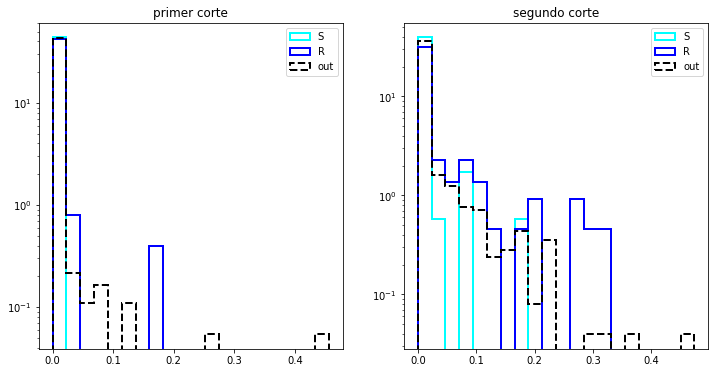

In [12]:
plt.figure(figsize=(12,6))
bines=20
plt.subplot(121)
range=(np.min(ts[out,8][cut0_u]/ts[out,7][cut0_u]),np.max(ts[out,8][cut0_u]/ts[out,7][cut0_u]))
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
plt.title('primer corte')
plt.hist(ts[ins,8][cut0_s]/ts[ins,7][cut0_s],histtype='step',lw=2,range=range,density='true',label='S',color='cyan',bins=bines)
plt.hist(tr[inr,8][cut0_r]/tr[inr,7][cut0_r],histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines)
plt.hist(ts[out,8][cut0_u]/ts[out,7][cut0_u],histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.semilogy()

plt.subplot(122)
plt.title('segundo corte')
range=(np.min(ts[out,8][cut1_u]/ts[out,7][cut1_u]),np.max(ts[out,8][cut1_u]/ts[out,7][cut1_u]))
plt.hist(ts[ins,8][cut1_s]/ts[ins,7][cut1_s],histtype='step',lw=2,range=range,density='true',label='S',color='cyan',bins=bines)
plt.hist(tr[inr,8][cut1_r]/tr[inr,7][cut1_r],histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines)
plt.hist(ts[out,8][cut1_u]/ts[out,7][cut1_u],histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.semilogy()


[]

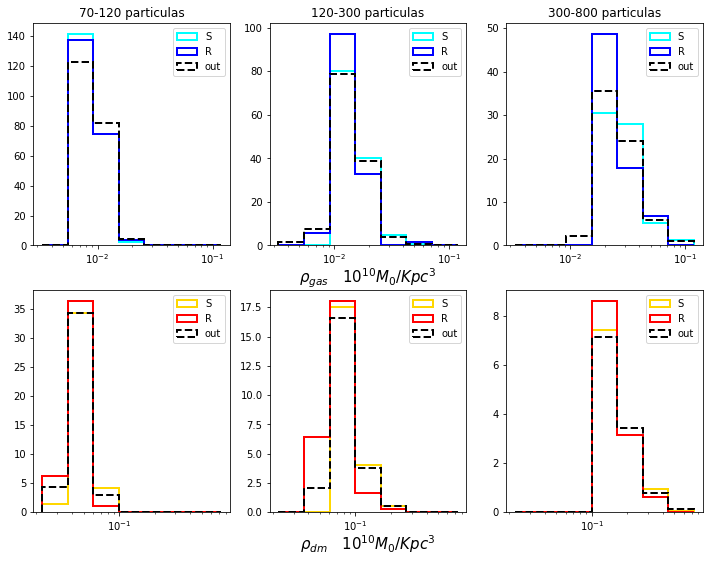

In [19]:
#Estas son las densidades, estoy tomando particulas a dos radios viriales,entonces 
#seria la masa de particulas dividido 2 radios viriales

plt.figure(figsize=(12,9))
bines0=8
factor=2

minimo=np.min(np.append(ts[outs,6][cut1_us]*masa_gs/(factor*ts[outs,4][cut1_us]),tr[outr,6][cut1_ur]*masa_gs/(factor*tr[outr,4][cut1_ur])))
maximo=np.max(np.append(ts[outs,6][cut2_us]*masa_gs/(factor*ts[outs,4][cut2_us]),tr[outr,6][cut2_ur]*masa_gs/(factor*tr[outr,4][cut2_ur])))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)
plt.subplot(231)
factor=2
#minimo=np.min(ts[out,6][cut0_u]*masa_gs/(factor*ts[out,4][cut0_u])) 
#minimo=0.00005
#maximo=np.max(ts[out,6][cut0_u]*masa_gs/(factor*ts[out,4][cut0_u]))
range=(minimo,maximo)
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
plt.title('70-120 particulas')
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

h1=ts[ins,6][cut0_s]*masa_gs/(factor*ts[ins,4][cut0_s])
h2=tr[inr,6][cut0_r]*masa_gs/(factor*tr[inr,4][cut0_r])
h3=np.append(ts[outs,6][cut0_us]*masa_gs/(factor*ts[outs,4][cut0_us]),tr[outr,6][cut0_ur]*masa_gs/(factor*tr[outr,4][cut0_ur]))
plt.hist(h1,histtype='step',lw=2,density='true',label='S',color='cyan',bins=bines)
plt.hist(h2,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines)
plt.hist(h3,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
#plt.xlabel('$\\rho_{gas} \hspace{1}10^{10}M_{0}/Kpc^{3}$',size=15)
#plt.semilogy()
plt.semilogx()

plt.subplot(232)
plt.title('120-300 particulas')
#minimo=np.min(ts[out,6][cut1_u]*masa_gs/(factor*ts[out,4][cut1_u]))
#maximo=np.max(ts[out,6][cut1_u]*masa_gs/(factor*ts[out,4][cut1_u]))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

range=(minimo,maximo)
h4=ts[ins,6][cut1_s]*masa_gs/(factor*ts[ins,4][cut1_s])
h5=tr[inr,6][cut1_r]*masa_gs/(factor*tr[inr,4][cut1_r])
h6=np.append(ts[outs,6][cut1_us]*masa_gs/(factor*ts[outs,4][cut1_us]),tr[outr,6][cut1_ur]*masa_gs/(factor*tr[outr,4][cut1_ur]))
plt.hist(h4,histtype='step',lw=2,range=range,density='true',label='S',color='cyan',bins=bines)
plt.hist(h5,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines)
plt.hist(h6,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$\\rho_{gas} \hspace{1}10^{10}M_{0}/Kpc^{3}$',size=15,labelpad=0)
#plt.semilogy()
plt.semilogx()

plt.subplot(233)
plt.title('300-800 particulas')
#minimo=np.min(ts[out,6][cut2_u]*masa_gs/(factor*ts[out,4][cut2_u]))
#maximo=np.max(ts[out,6][cut2_u]*masa_gs/(factor*ts[out,4][cut2_u]))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

range=(minimo,maximo)
h4=ts[ins,6][cut2_s]*masa_gs/(factor*ts[ins,4][cut2_s])
h5=tr[inr,6][cut2_r]*masa_gs/(factor*tr[inr,4][cut2_r])
h6=np.append(ts[outs,6][cut2_us]*masa_gs/(factor*ts[outs,4][cut2_us]),tr[outr,6][cut2_ur]*masa_gs/(factor*tr[outr,4][cut2_ur]))
plt.hist(h4,histtype='step',lw=2,range=range,density='true',label='S',color='cyan',bins=bines)
plt.hist(h5,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines)
plt.hist(h6,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
#plt.xlabel('$\\rho_{gas} \hspace{1}10^{10}M_{0}/Kpc^{3}$',size=15)
#plt.semilogy()
plt.semilogx()
###############################################################3
###############################################################

plt.subplot(234)
factor=2
minimo=np.min(np.append(ts[outs,7][cut0_us]*masa_dm/(factor*ts[outs,4][cut0_us]),tr[outr,7][cut0_ur]*masa_dm/(factor*tr[outr,4][cut0_ur]))) 
maximo=np.max(np.append(ts[outs,7][cut2_us]*masa_dm/(factor*ts[outs,4][cut2_us]),tr[outr,7][cut2_ur]*masa_dm/(factor*tr[outr,4][cut2_ur])))
range=(minimo,maximo)
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

h1=ts[ins,7][cut0_s]*masa_dm/(factor*ts[ins,4][cut0_s])
h2=tr[inr,7][cut0_r]*masa_dm/(factor*tr[inr,4][cut0_r])
h3=np.append(ts[outs,7][cut0_us]*masa_dm/(factor*ts[outs,4][cut0_us]),tr[outr,7][cut0_ur]*masa_dm/(factor*tr[outr,4][cut0_ur]))

plt.hist(h1,histtype='step',lw=2,range=range, density='true',label='S',color='gold',bins=bines)
plt.hist(h2,histtype='step',lw=2,range=range,density='true',label='R',color='red',bins=bines)
plt.hist(h3,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
#plt.xlabel('$\\rho_{dm} \hspace{1}10^{10}M_{0}/Kpc^{3}$',size=15)
#plt.semilogy()
plt.semilogx()

plt.subplot(235)
range=(minimo,maximo)
h4=ts[ins,7][cut1_s]*masa_dm/(factor*ts[ins,4][cut1_s])
h5=tr[inr,7][cut1_r]*masa_dm/(factor*tr[inr,4][cut1_r])
h6=np.append(ts[outs,7][cut1_us]*masa_dm/(factor*ts[outs,4][cut1_us]),tr[outr,7][cut1_ur]*masa_dm/(factor*tr[outr,4][cut1_ur]))

plt.hist(h4,histtype='step',lw=2,range=range,density='true',label='S',color='gold',bins=bines)
plt.hist(h5,histtype='step',lw=2,range=range,density='true',label='R',color='red',bins=bines)
plt.hist(h6,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$\\rho_{dm} \hspace{1}10^{10}M_{0}/Kpc^{3}$',size=15,labelpad=0)
#plt.semilogy()
plt.semilogx()

plt.subplot(236)
range=(minimo,maximo)
h4=ts[ins,7][cut2_s]*masa_dm/(factor*ts[ins,4][cut2_s])
h5=tr[inr,7][cut2_r]*masa_dm/(factor*tr[inr,4][cut2_r])
h6=np.append(ts[outs,7][cut2_us]*masa_dm/(factor*ts[outs,4][cut2_us]),tr[outr,7][cut2_ur]*masa_dm/(factor*tr[outr,4][cut2_ur]))

plt.hist(h4,histtype='step',lw=2,range=range,density='true',label='S',color='gold',bins=bines)
plt.hist(h5,histtype='step',lw=2,range=range,density='true',label='R',color='red',bins=bines)
plt.hist(h6,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
#plt.xlabel('$\\rho_{dm} \hspace{1}10^{10}M_{0}/Kpc^{3}$',size=15,labelpad=.5)
#plt.semilogy()
plt.semilogx()

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/Densidades_cortemasa.png',format='png')

NameError: name 'out' is not defined

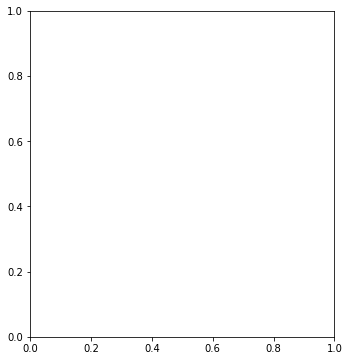

In [11]:
plt.figure(figsize=(12,6))
bines0=20
plt.subplot(121)
rango=(np.min(ts[out,11][cut0_u]),np.max(ts[out,11][cut0_u]))
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))

plt.title('primer corte')
plt.hist(ts[ins,11][cut0_s],histtype='step',lw=2,density='true',range=rango,label='S',color='cyan',bins=bines0)
plt.hist(tr[inr,11][cut0_r],histtype='step',lw=2,density='true',range=rango,label='R',color='blue',bins=bines0)
plt.hist(ts[out,11][cut0_u],histtype='step',lw=2,density='true',range=rango,label='out',color='black',ls='--',bins=bines0)
plt.legend()
plt.xlabel('$spin$',size=15)

plt.subplot(122)
plt.title('segundo corte')
rango=(np.min(ts[out,11][cut1_u]),np.max(ts[out,11][cut1_u]))
rango=(0,0.2)
plt.hist(ts[ins,11][cut1_s],histtype='step',lw=2,density='true',range=rango,label='S',color='cyan',bins=bines0)
plt.hist(tr[inr,11][cut1_r],histtype='step',lw=2,density='true',range=rango,label='R',color='blue',bins=bines0)
plt.hist(ts[out,11][cut1_u],histtype='step',lw=2,density='true',range=rango,label='out',color='black',ls='--',bins=bines0)
plt.legend()
plt.xlabel('$spin$',size=15)
#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/Spin_cortemasa.png',format='png')

(0, 3e-09)

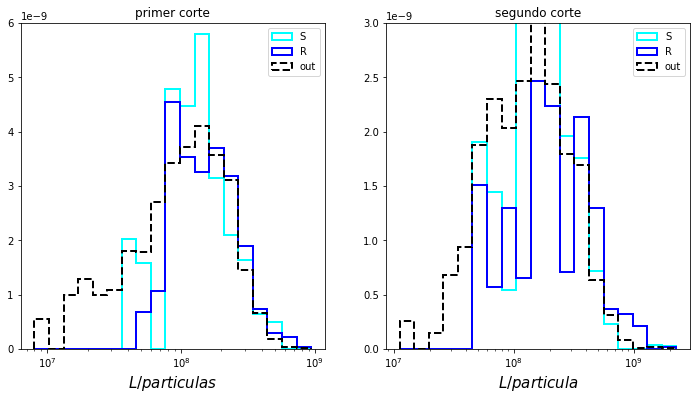

In [27]:
plt.figure(figsize=(12,6))
bines0=20
plt.subplot(121)
minimo=np.min(ts[out,12][cut0_u]/ts[out,5][cut0_u])
maximo=np.max(ts[out,12][cut0_u]/ts[out,5][cut0_u])
#rango=(np.min(ts[out,12][cut0_u]),np.max(ts[out,12][cut0_u]))
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

plt.title('primer corte')
plt.hist(ts[ins,12][cut0_s]/ts[ins,5][cut0_s],histtype='step',lw=2,density='true',range=rango,label='S',color='cyan',bins=bines)
plt.hist(tr[inr,12][cut0_r]/tr[inr,5][cut0_r],histtype='step',lw=2,density='true',range=rango,label='R',color='blue',bins=bines)
plt.hist(ts[out,12][cut0_u]/ts[out,5][cut0_u],histtype='step',lw=2,density='true',range=rango,label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$L/particulas$',size=15)
plt.semilogx()
#plt.semilogy()
plt.ylim(0,6e-9)

plt.subplot(122)
plt.title('segundo corte')
#rango=(np.min(ts[out,12][cut1_u]),np.max(ts[out,12][cut1_u]))
minimo=np.min(ts[out,12][cut1_u]/ts[out,5][cut1_u])
maximo=np.max(ts[out,12][cut1_u]/ts[out,5][cut1_u])
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

#rango=(0,1)
plt.hist(ts[ins,12][cut1_s]/ts[ins,5][cut1_s],histtype='step',lw=2,density='true',range=rango,label='S',color='cyan',bins=bines)
plt.hist(tr[inr,12][cut1_r]/tr[inr,5][cut1_r],histtype='step',lw=2,density='true',range=rango,label='R',color='blue',bins=bines)
plt.hist(ts[out,12][cut1_u]/ts[out,5][cut1_u],histtype='step',lw=2,density='true',range=rango,label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$L/particula$',size=15)
plt.semilogx()
#plt.semilogy()
plt.ylim(0,3e-9)

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/Momangular_cortemasa.png',format='png')

S: 47482.237773333334 12608.328156756
R: 47675.33590315316 16175.777495004557
U: 166890.09684686083 17029.781144542343
segundo corte
S: 96689.65726575343 25194.315309260804
R: 89407.61984456523 29988.333762936403
U: 359823.2990047431 26899.88391083724
tercer corte
S: 133239.24639374999 24953.18578074945
R: 261508.03402777776 87048.27115230494
U: 571625.7864539461 41688.509860253325


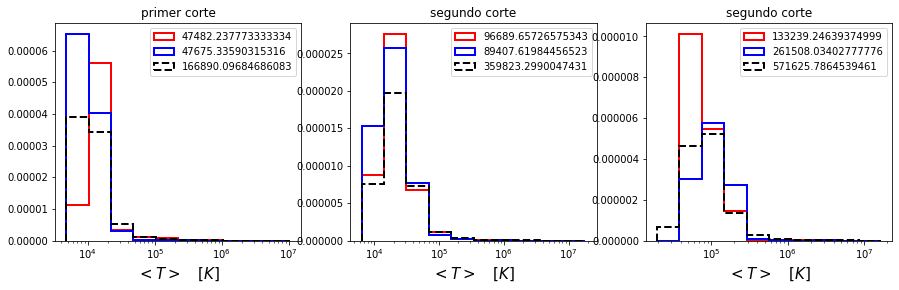

In [86]:
plt.figure(figsize=(15,4))
bines0=11

plt.subplot(131)

#tengo algunos halos con temperatura NAN y tengo que eliminarlos

fuera=np.append(ts[outs,13][cut0_us],tr[outr,13][cut0_ur])
#minimo=np.min(ts[out,13][cut0_u])
#minimo=0.000001
#maximo=np.max(ts[out,13][cut0_u])
minimo=np.min(fuera)
maximo=np.max(fuera)
rango=(np.log10(minimo),np.log10(maximo))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)
#rango=(np.min(ts[out,12][cut0_u]),np.max(ts[out,12][cut0_u]))
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
#bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

plt.title('primer corte')
plt.hist(ts[ins,13][cut0_s],histtype='step',lw=2,density='true',label=np.mean(ts[ins,13][cut0_s]),color='red',bins=bines)
plt.hist(tr[inr,13][cut0_r],histtype='step',lw=2,density='true',label=np.mean(tr[inr,13][cut0_r]),color='blue',bins=bines)
plt.hist(fuera,histtype='step',lw=2,density='true',label=np.mean(fuera),color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$<T>\hspace{1}[K]$',size=15)
plt.semilogx()
#plt.semilogy()

print('S:',np.mean(ts[ins,13][cut0_s]),np.std(ts[ins,13][cut0_s])/np.sqrt(len(ts[ins,13][cut0_s])))
print('R:',np.mean(tr[inr,13][cut0_r]),np.std(tr[inr,13][cut0_r])/np.sqrt(len(tr[inr,13][cut0_r])))
print('U:',np.mean(fuera),np.std(fuera)/np.sqrt(len(fuera)))


plt.subplot(132)
plt.title('segundo corte')
#rango=(np.min(ts[out,12][cut1_u]),np.max(ts[out,12][cut1_u]))
fuera=np.append(ts[outs,13][cut1_us],tr[outr,13][cut1_ur])

minimo=np.min(fuera)
maximo=np.max(fuera)
rango=(np.log10(minimo),np.log10(maximo))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

#rango=(0,1)
plt.hist(ts[ins,13][cut1_s],histtype='step',lw=2,density='true',range=rango,label=np.mean(ts[ins,13][cut1_s]),color='red',bins=bines)
plt.hist(tr[inr,13][cut1_r],histtype='step',lw=2,density='true',range=rango,label=np.mean(tr[inr,13][cut1_r]),color='blue',bins=bines)
plt.hist(fuera,histtype='step',lw=2,density='true',range=rango,label=np.mean(fuera),color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$<T>\hspace{1}[K]$',size=15)
plt.semilogx()
#plt.semilogy()
print('segundo corte')
print('S:',np.mean(ts[ins,13][cut1_s]),np.std(ts[ins,13][cut1_s])/np.sqrt(len(ts[ins,13][cut1_s])))
print('R:',np.mean(tr[inr,13][cut1_r]),np.std(tr[inr,13][cut1_r])/np.sqrt(len(tr[inr,13][cut1_r])))
print('U:',np.mean(fuera),np.std(fuera)/np.sqrt(len(fuera)))

plt.subplot(133)
plt.title('segundo corte')
fuera=np.append(ts[outs,13][cut2_us],tr[outr,13][cut2_ur])
minimo=np.min(fuera)
maximo=np.max(fuera)
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)
plt.hist(ts[ins,13][cut2_s],histtype='step',lw=2,density='true',range=rango,label=np.mean(ts[ins,13][cut2_s]),color='red',bins=bines)
plt.hist(tr[inr,13][cut2_r],histtype='step',lw=2,density='true',range=rango,label=np.mean(tr[inr,13][cut2_r]),color='blue',bins=bines)
plt.hist(fuera,histtype='step',lw=2,density='true',range=rango,label=np.mean(fuera),color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$<T>\hspace{1}[K]$',size=15)
plt.semilogx()
#plt.semilogy()
print('tercer corte')
print('S:',np.mean(ts[ins,13][cut2_s]),np.std(ts[ins,13][cut2_s])/np.sqrt(len(ts[ins,13][cut2_s])))
print('R:',np.mean(tr[inr,13][cut2_r]),np.std(tr[inr,13][cut2_r])/np.sqrt(len(tr[inr,13][cut2_r])))
print('U:',np.mean(fuera),np.std(fuera)/np.sqrt(len(fuera)))
#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/temperatura_cortemasa_mean.png',format='png')

In [21]:
q75, q25 = np.percentile(fuera, [75 ,25])
iqr = q75 - q25
iqr

192395.01559999998

primer corte
S 17310.866199999997 9036.167175
R 11255.2119 5170.070345
U 16349.6069 35189.761925000006
segundo corte
S 28792.9023 32657.837799999998
R 27472.57325 28265.486375
U 39242.0195 92987.34575
terer corte
S 95094.03904999999 68772.71985000001
R 142218.922 107840.20124999998
U 134693.891 192395.01559999998


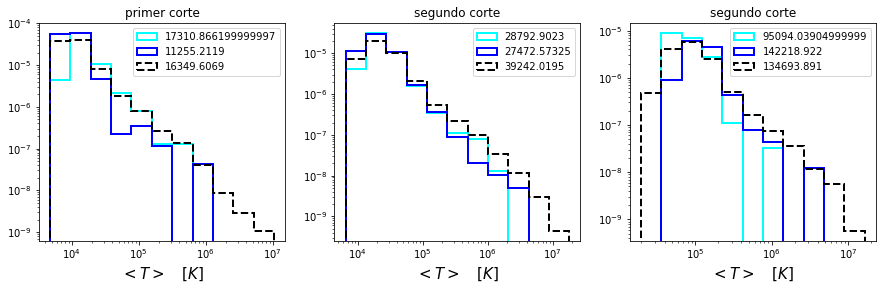

In [25]:
plt.figure(figsize=(15,4))
bines0=12

plt.subplot(131)
fuera=np.append(ts[outs,13][cut0_us],tr[outr,13][cut0_ur])
#minimo=np.min(ts[out,13][cut0_u])
#minimo=0.000001
#maximo=np.max(ts[out,13][cut0_u])
minimo=np.min(fuera)
maximo=np.max(fuera)
rango=(np.log10(minimo),np.log10(maximo))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)
#rango=(np.min(ts[out,12][cut0_u]),np.max(ts[out,12][cut0_u]))
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
#bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

plt.title('primer corte')
plt.hist(ts[ins,13][cut0_s],histtype='step',lw=2,density='true',label=np.median(ts[ins,13][cut0_s]),color='cyan',bins=bines)
plt.hist(tr[inr,13][cut0_r],histtype='step',lw=2,density='true',label=np.median(tr[inr,13][cut0_r]),color='blue',bins=bines)
plt.hist(fuera,histtype='step',lw=2,density='true',label=np.median(fuera),color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$<T>\hspace{1}[K]$',size=15)
plt.semilogx()
plt.semilogy()
print('primer corte')
q75, q25 = np.percentile(ts[ins,13][cut0_s], [75 ,25])
print('S',np.median(ts[ins,13][cut0_s]), q75 - q25)
q75, q25 = np.percentile(tr[inr,13][cut0_r], [75 ,25])
print('R',np.median(tr[inr,13][cut0_r]), q75 - q25)
q75, q25 = np.percentile(fuera, [75 ,25])
print('U',np.median(fuera), q75 - q25)



plt.subplot(132)
plt.title('segundo corte')
#rango=(np.min(ts[out,12][cut1_u]),np.max(ts[out,12][cut1_u]))
fuera=np.append(ts[outs,13][cut1_us],tr[outr,13][cut1_ur])

minimo=np.min(fuera)
maximo=np.max(fuera)
rango=(np.log10(minimo),np.log10(maximo))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

#rango=(0,1)
plt.hist(ts[ins,13][cut1_s],histtype='step',lw=2,density='true',range=rango,label=np.median(ts[ins,13][cut1_s]),color='cyan',bins=bines)
plt.hist(tr[inr,13][cut1_r],histtype='step',lw=2,density='true',range=rango,label=np.median(tr[inr,13][cut1_r]),color='blue',bins=bines)
plt.hist(fuera,histtype='step',lw=2,density='true',range=rango,label=np.median(fuera),color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$<T>\hspace{1}[K]$',size=15)
plt.semilogx()
plt.semilogy()
print('segundo corte')
q75, q25 = np.percentile(ts[ins,13][cut1_s], [75 ,25])
print('S',np.median(ts[ins,13][cut1_s]), q75 - q25)
q75, q25 = np.percentile(tr[inr,13][cut1_r], [75 ,25])
print('R',np.median(tr[inr,13][cut1_r]), q75 - q25)
q75, q25 = np.percentile(fuera, [75 ,25])
print('U',np.median(fuera), q75 - q25)

plt.subplot(133)
plt.title('segundo corte')
fuera=np.append(ts[outs,13][cut2_us],tr[outr,13][cut2_ur])
minimo=np.min(fuera)
maximo=np.max(fuera)
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)
plt.hist(ts[ins,13][cut2_s],histtype='step',lw=2,density='true',range=rango,label=np.median(ts[ins,13][cut2_s]),color='cyan',bins=bines)
plt.hist(tr[inr,13][cut2_r],histtype='step',lw=2,density='true',range=rango,label=np.median(tr[inr,13][cut2_r]),color='blue',bins=bines)
plt.hist(fuera,histtype='step',lw=2,density='true',range=rango,label=np.median(fuera),color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$<T>\hspace{1}[K]$',size=15)
plt.semilogx()
plt.semilogy()
print('terer corte')
q75, q25 = np.percentile(ts[ins,13][cut2_s], [75 ,25])
print('S',np.median(ts[ins,13][cut2_s]), q75 - q25)
q75, q25 = np.percentile(tr[inr,13][cut2_r], [75 ,25])
print('R',np.median(tr[inr,13][cut2_r]), q75 - q25)
q75, q25 = np.percentile(fuera, [75 ,25])
print('U',np.median(fuera), q75 - q25)
#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/temperatura_cortemasa_median.png',format='png')

In [31]:
s=[1,2,2,3]
q75, q25 = np.percentile(s, [100 ,25])
q75

3.0

[]

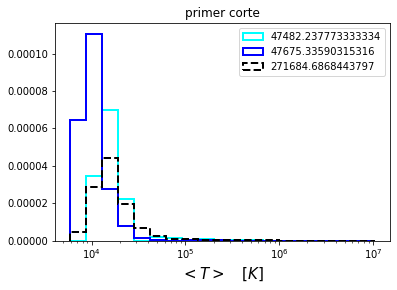

In [8]:
minimo=np.min(ts[out,13][cut0_u])
#minimo=0.000001
maximo=np.max(ts[out,13][cut0_u])
bines0=20
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)


plt.title('primer corte')
plt.hist(ts[ins,13][cut0_s],histtype='step',lw=2,density='true',label=np.mean(ts[ins,13][cut0_s]),color='cyan',bins=bines)
plt.hist(tr[inr,13][cut0_r],histtype='step',lw=2,density='true',label=np.mean(tr[inr,13][cut0_r]),color='blue',bins=bines)
plt.hist(ts[out,13][cut0_u],histtype='step',lw=2,density='true',label=np.mean(ts[out,13][cut0_u]),color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$<T>\hspace{1}[K]$',size=15)
plt.semilogx()

In [45]:
np.max(ts[out,13][cut0_u])

10431772.0